<a href="https://colab.research.google.com/github/Haritha-PV/Used-car-prediction/blob/main/Used_car_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INTERNSHIP**

# **MINOR PROJECT**- USED CAR PRICE

The dataset of used cars consist of details of cars with its specification,  which is used to build a regression model for the prediction of car prices.

# Importing essential libraries

In [ ]:
#Loading the necessary libraries
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Mounting the drive

In [ ]:
#Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#file location
file_path='/content/drive/MyDrive/Used cars AND Internship/used_car_dataset.csv'

# Reading the data

In [ ]:
#importing the dataset
dataset=pd.read_csv(file_path)


In [ ]:
print(dataset)

                                               car_name car_price_in_rupees  \
0     Hyundai Grand i10 Magna 1.2 Kappa VTVT [2017-2...         ₹ 4.45 Lakh   
1                            Maruti Suzuki Alto 800 Lxi         ₹ 2.93 Lakh   
2                               Tata Safari XZ Plus New        ₹ 22.49 Lakh   
3                               Maruti Suzuki Ciaz ZXI+         ₹ 6.95 Lakh   
4        Jeep Compass Sport Plus 1.4 Petrol [2019-2020]           ₹ 12 Lakh   
...                                                 ...                 ...   
2100                         Ford Figo Titanium1.5 TDCi          ₹ 3.6 Lakh   
2101                    MINI Cooper Countryman Cooper D           ₹ 22 Lakh   
2102                          Hyundai Verna 1.6 VTVT SX         ₹ 8.38 Lakh   
2103                         Maruti Suzuki Ciaz VXi+ AT         ₹ 6.75 Lakh   
2104                          Hyundai Verna 1.6 VTVT SX         ₹ 8.76 Lakh   

     kms_driven fuel_type       city  year_of_manuf

In [ ]:
dataset.describe()

,year_of_manufacture
count,2105.000000
mean,2017.022803
std,2.818066
min,2004.000000
25%,2015.000000
50%,2017.000000
75%,2019.000000
max,2022.000000


In [ ]:
dataset.columns

Index(['car_name', 'car_price_in_rupees', 'kms_driven', 'fuel_type', 'city',
       'year_of_manufacture'],
      dtype='object')

In [ ]:
dataset.shape

(2105, 6)

In [ ]:
#Checking unique values for each variable
print(dataset.apply(lambda col: col.unique()))

car_name               [Hyundai Grand i10 Magna 1.2 Kappa VTVT [2017-...
car_price_in_rupees    [₹ 4.45 Lakh, ₹ 2.93 Lakh, ₹ 22.49 Lakh, ₹ 6.9...
kms_driven             [22,402 km, 10,344 km, 12,999 km, 45,000 km, 1...
fuel_type              [Petrol, Diesel, Diesel + 1, Electric, CNG, Pe...
city                   [Mumbai, Kolkata, Bangalore, Thane, Chennai, A...
year_of_manufacture    [2016, 2019, 2021, 2017, 2013, 2018, 2007, 202...
dtype: object


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105 entries, 0 to 2104
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   car_name             2105 non-null   object
 1   car_price_in_rupees  2105 non-null   object
 2   kms_driven           2105 non-null   object
 3   fuel_type            2105 non-null   object
 4   city                 2105 non-null   object
 5   year_of_manufacture  2105 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 98.8+ KB


# Duplicate values

In [ ]:
dataset.duplicated().value_counts()
#true is for duplicate values

False    2013
True       92
dtype: int64

Out of 2105 dataset 92 are duplicate rows,we have to eliminate those.

In [ ]:
#Eliminating duplicate values
dataset=dataset.drop_duplicates()

In [ ]:
dataset.shape

(2013, 6)

In [ ]:
dataset.reset_index()

,index,car_name,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture
0,0,Hyundai Grand i10 Magna 1.2 Kappa VTVT [2017-2...,₹ 4.45 Lakh,"22,402 km",Petrol,Mumbai,2016
1,1,Maruti Suzuki Alto 800 Lxi,₹ 2.93 Lakh,"10,344 km",Petrol,Kolkata,2019
2,2,Tata Safari XZ Plus New,₹ 22.49 Lakh,"12,999 km",Diesel,Bangalore,2021
3,3,Maruti Suzuki Ciaz ZXI+,₹ 6.95 Lakh,"45,000 km",Petrol,Thane,2016
4,4,Jeep Compass Sport Plus 1.4 Petrol [2019-2020],₹ 12 Lakh,"11,193 km",Petrol,Kolkata,2019
...,...,...,...,...,...,...,...
2008,2100,Ford Figo Titanium1.5 TDCi,₹ 3.6 Lakh,"42,158 km",Diesel,Kolkata,2015
2009,2101,MINI Cooper Countryman Cooper D,₹ 22 Lakh,"68,862 km",Diesel,Hyderabad,2013
2010,2102,Hyundai Verna 1.6 VTVT SX,₹ 8.38 Lakh,"37,622 km",Petrol,Chennai,2018
2011,2103,Maruti Suzuki Ciaz VXi+ AT,₹ 6.75 Lakh,"64,726 km",Petrol,Mumbai,2017


# Missing values

In [ ]:
null_df=pd.DataFrame(dataset.isna().sum()).rename(columns={0:'Number of null values'})
print(null_df)

                     Number of null values
car_name                                 0
car_price_in_rupees                      0
kms_driven                               0
fuel_type                                0
city                                     0
year_of_manufacture                      0


Hence there is no null values in the dataset

In [ ]:
#Missing values
missing_values=dataset.isnull().sum().sort_values(ascending=False)
print(missing_values)

car_name               0
car_price_in_rupees    0
kms_driven             0
fuel_type              0
city                   0
year_of_manufacture    0
dtype: int64


There is no missing values

# Creating new column of car brand

In [ ]:
dataset.insert(1, "car_brand", dataset["car_name"].str.split(" ").str[0])

In [ ]:
dataset.car_brand.unique()

array(['Hyundai', 'Maruti', 'Tata', 'Jeep', 'Toyota', 'Renault',
       'Chevrolet', 'Mercedes-Benz', 'Ford', 'Porsche', 'Kia', 'BMW',
       'Honda', 'Audi', 'MG', 'Skoda', 'Volkswagen', 'Volvo', 'Mahindra',
       'Nissan', 'Land', 'Isuzu', 'Jaguar', 'MINI', 'Datsun', 'Fiat',
       'Citroen', 'Bentley'], dtype=object)

<Axes: xlabel='car_brand', ylabel='Count'>

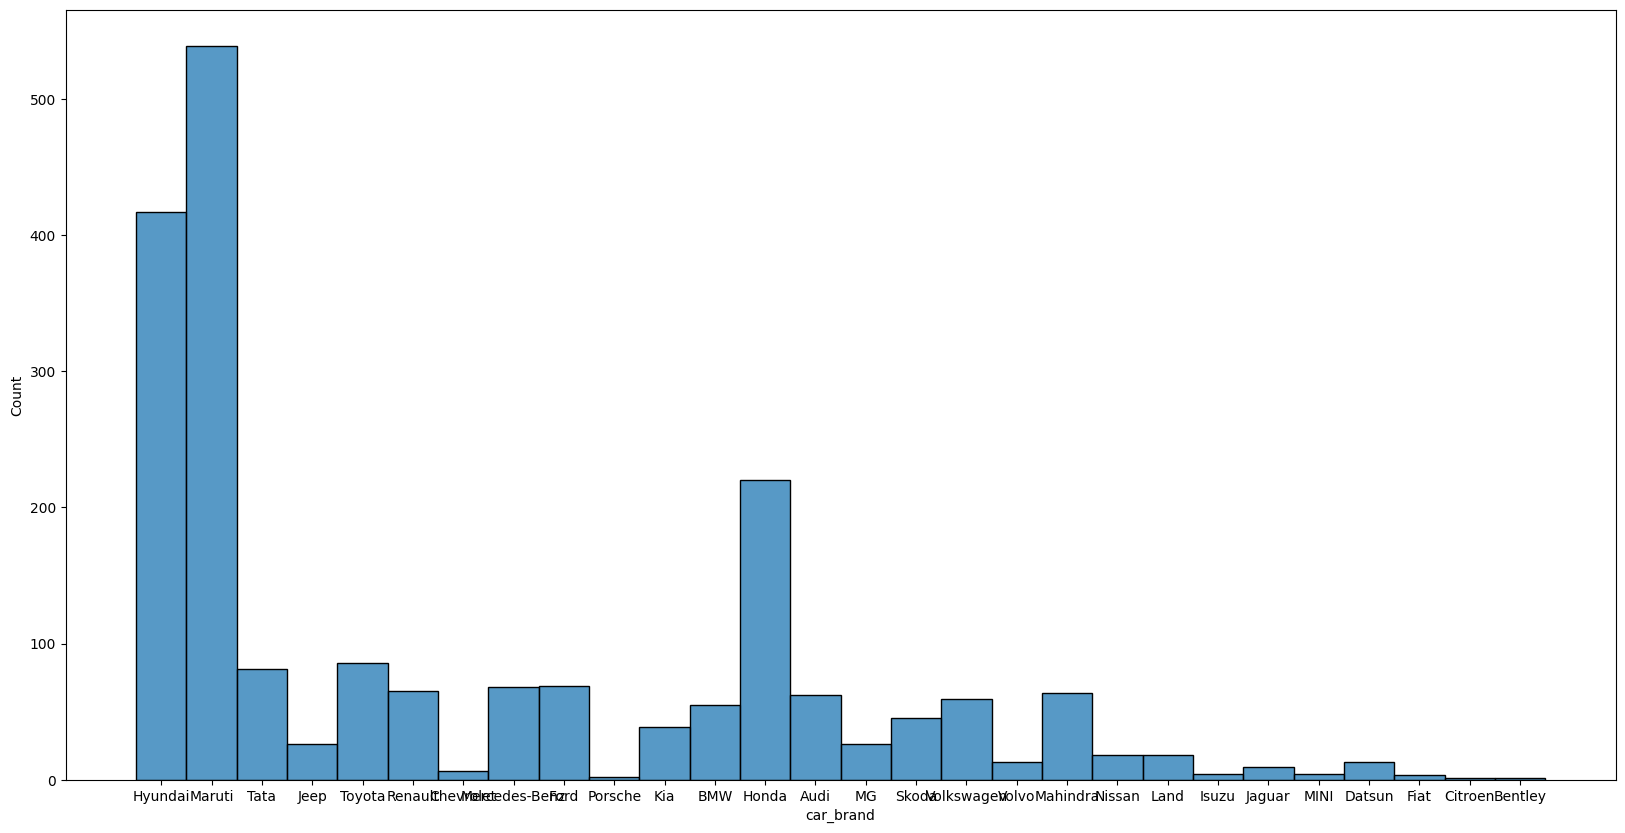

In [ ]:
plt.figure(figsize=(20,10))
sns.histplot(dataset['car_brand'])

# Converting object into float and integer

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2013 entries, 0 to 2104
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   car_name             2013 non-null   object
 1   car_brand            2013 non-null   object
 2   car_price_in_rupees  2013 non-null   object
 3   kms_driven           2013 non-null   object
 4   fuel_type            2013 non-null   object
 5   city                 2013 non-null   object
 6   year_of_manufacture  2013 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 125.8+ KB


Here from info we can see that datatype is object for 5 columns,lets convert datatype of car_price_in_rupees into float and kms_driven into integer

In [ ]:
import re
def preprocess_string(s):
#remove all non digit characters from string
  s=re.sub(r'[^\d]','',s)
#convert thestring into a floating point number
  return float(s)*1000

In [ ]:
dataset1=dataset.copy()
dataset1['car_price_in_rupees']=dataset1['car_price_in_rupees'].apply(preprocess_string)
dataset1.head()

,car_name,car_brand,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture
0,Hyundai Grand i10 Magna 1.2 Kappa VTVT [2017-2...,Hyundai,445000.0,"22,402 km",Petrol,Mumbai,2016
1,Maruti Suzuki Alto 800 Lxi,Maruti,293000.0,"10,344 km",Petrol,Kolkata,2019
2,Tata Safari XZ Plus New,Tata,2249000.0,"12,999 km",Diesel,Bangalore,2021
3,Maruti Suzuki Ciaz ZXI+,Maruti,695000.0,"45,000 km",Petrol,Thane,2016
4,Jeep Compass Sport Plus 1.4 Petrol [2019-2020],Jeep,12000.0,"11,193 km",Petrol,Kolkata,2019


In [ ]:
import re

def preproces_string(s):
#remove all non digit characters from string
  s=re.sub(r'[^\d]','',s)
#convert thestring into a floating point number
  return float(s)

In [ ]:
dataset1['kms_driven']=dataset1['kms_driven'].apply(preproces_string).astype(int)

In [ ]:
dataset1.head()

,car_name,car_brand,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture
0,Hyundai Grand i10 Magna 1.2 Kappa VTVT [2017-2...,Hyundai,445000.0,22402,Petrol,Mumbai,2016
1,Maruti Suzuki Alto 800 Lxi,Maruti,293000.0,10344,Petrol,Kolkata,2019
2,Tata Safari XZ Plus New,Tata,2249000.0,12999,Diesel,Bangalore,2021
3,Maruti Suzuki Ciaz ZXI+,Maruti,695000.0,45000,Petrol,Thane,2016
4,Jeep Compass Sport Plus 1.4 Petrol [2019-2020],Jeep,12000.0,11193,Petrol,Kolkata,2019


In [ ]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2013 entries, 0 to 2104
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   car_name             2013 non-null   object 
 1   car_brand            2013 non-null   object 
 2   car_price_in_rupees  2013 non-null   float64
 3   kms_driven           2013 non-null   int64  
 4   fuel_type            2013 non-null   object 
 5   city                 2013 non-null   object 
 6   year_of_manufacture  2013 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 125.8+ KB


# Data cleaning for fuel type

In [ ]:
dataset1.fuel_type.unique()

array(['Petrol', 'Diesel', 'Diesel + 1', 'Electric', 'CNG', 'Petrol + 1',
       'Hybrid', 'LPG'], dtype=object)

In [ ]:
dataset1.loc[dataset1["fuel_type"]=="Diesel + 1","fuel_type"]="Diesel"
dataset1.loc[dataset1['fuel_type']=='Petrol + 1','fuel_type']='Petrol'

In [ ]:
dataset1.fuel_type.unique()

array(['Petrol', 'Diesel', 'Electric', 'CNG', 'Hybrid', 'LPG'],
      dtype=object)

<Axes: xlabel='fuel_type', ylabel='Count'>

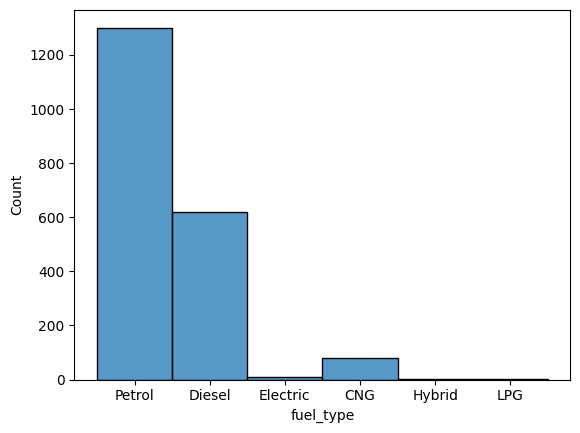

In [ ]:
sns.histplot(dataset1['fuel_type'])

# Creating new column car age

Claculating age of car from its manufacturing year

In [ ]:
def calculate_car_age(year_of_manufacture):
  current_year=datetime.datetime.now().year
  age=current_year-year_of_manufacture
  return age

In [ ]:
dataset1['car_age']=dataset1['year_of_manufacture'].apply(calculate_car_age)
dataset1

,car_name,car_brand,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture,car_age
0,Hyundai Grand i10 Magna 1.2 Kappa VTVT [2017-2...,Hyundai,445000.0,22402,Petrol,Mumbai,2016,8
1,Maruti Suzuki Alto 800 Lxi,Maruti,293000.0,10344,Petrol,Kolkata,2019,5
2,Tata Safari XZ Plus New,Tata,2249000.0,12999,Diesel,Bangalore,2021,3
3,Maruti Suzuki Ciaz ZXI+,Maruti,695000.0,45000,Petrol,Thane,2016,8
4,Jeep Compass Sport Plus 1.4 Petrol [2019-2020],Jeep,12000.0,11193,Petrol,Kolkata,2019,5
...,...,...,...,...,...,...,...,...
2100,Ford Figo Titanium1.5 TDCi,Ford,36000.0,42158,Diesel,Kolkata,2015,9
2101,MINI Cooper Countryman Cooper D,MINI,22000.0,68862,Diesel,Hyderabad,2013,11
2102,Hyundai Verna 1.6 VTVT SX,Hyundai,838000.0,37622,Petrol,Chennai,2018,6
2103,Maruti Suzuki Ciaz VXi+ AT,Maruti,675000.0,64726,Petrol,Mumbai,2017,7


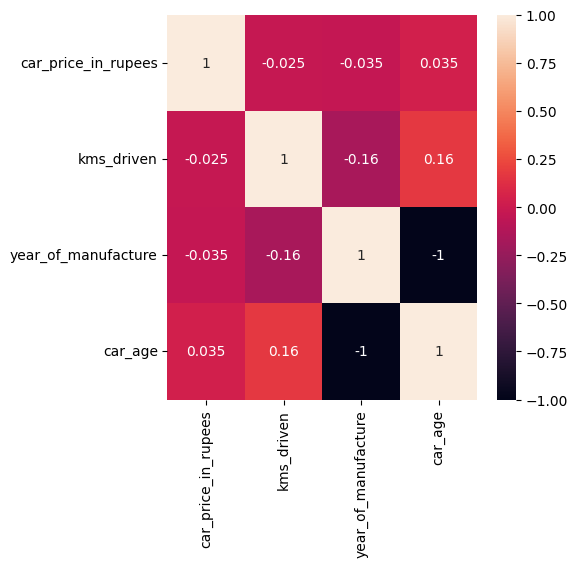

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(dataset1.corr(),annot=True)
plt.show()

In [ ]:
# all categorical columns with object dtype
categorical = dataset1.select_dtypes(include=['object'])
categorical.head()

,car_name,car_brand,fuel_type,city
0,Hyundai Grand i10 Magna 1.2 Kappa VTVT [2017-2...,Hyundai,Petrol,Mumbai
1,Maruti Suzuki Alto 800 Lxi,Maruti,Petrol,Kolkata
2,Tata Safari XZ Plus New,Tata,Diesel,Bangalore
3,Maruti Suzuki Ciaz ZXI+,Maruti,Petrol,Thane
4,Jeep Compass Sport Plus 1.4 Petrol [2019-2020],Jeep,Petrol,Kolkata


### Creating dummies of all the categorical columns in the dataset

In [ ]:
dummies= pd.get_dummies(categorical,drop_first=True)
dummies.head()


,car_name_Audi A3 35 TDI Premium Plus,car_name_Audi A3 35 TDI Premium Plus + Sunroof,car_name_Audi A3 35 TDI Technology + Sunroof,car_name_Audi A3 35 TFSI Premium Plus,car_name_Audi A3 40 TFSI Premium,car_name_Audi A3 40 TFSI Premium Plus + sunroof,car_name_Audi A4 2.0 TDI (143 bhp),car_name_Audi A4 2.0 TDI (143bhp),car_name_Audi A4 2.0 TDI (177bhp) Premium,car_name_Audi A4 2.0 TDI (177bhp) Premium Plus,...,city_Gurgaon,city_Hyderabad,city_Kolkata,city_Mumbai,city_Noida,city_Pallikarnai,city_Poonamallee,city_Pune,city_Thane,city_Thiruvallur
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
# concat the dummies dataframe to the main dataframe
dataset1 = pd.concat([dataset1,dummies],axis=1)


# dropping all the categorical columns as the dummies are already created
dataset1.drop(columns=categorical.columns,axis=1,inplace=True)

In [ ]:
dataset1.head()

,car_price_in_rupees,kms_driven,year_of_manufacture,car_age,car_name_Audi A3 35 TDI Premium Plus,car_name_Audi A3 35 TDI Premium Plus + Sunroof,car_name_Audi A3 35 TDI Technology + Sunroof,car_name_Audi A3 35 TFSI Premium Plus,car_name_Audi A3 40 TFSI Premium,car_name_Audi A3 40 TFSI Premium Plus + sunroof,...,city_Gurgaon,city_Hyderabad,city_Kolkata,city_Mumbai,city_Noida,city_Pallikarnai,city_Poonamallee,city_Pune,city_Thane,city_Thiruvallur
0,445000.0,22402,2016,8,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,293000.0,10344,2019,5,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,2249000.0,12999,2021,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,695000.0,45000,2016,8,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,12000.0,11193,2019,5,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
dataset1.shape

(2013, 996)

# Train test split

In [ ]:
x=dataset1.drop('car_price_in_rupees',axis=1)
y=dataset1['car_price_in_rupees']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

# Outliers

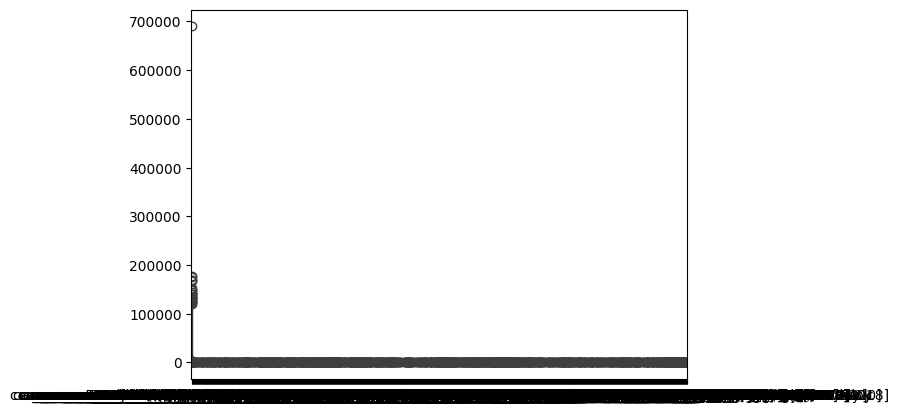

In [ ]:
sns.boxplot(data=x_train)
plt.show()

In [ ]:
Q1 = x_train.quantile(0.25)
Q3 = x_train.quantile(0.75)
IQR = Q3 - Q1
outliers = ((x_train < (Q1 - 1.5 * IQR)) | (x_train > (Q3 + 1.5 * IQR))).any(axis=1)

In [ ]:
x_train_no_outliers = x_train[~outliers]
y_train_no_outliers = y_train[~outliers]

In [ ]:
median_values = np.median(x_train, axis=1, keepdims=True)
x_train_transformed = np.where(outliers[:, np.newaxis], median_values, x_train)


# Scaling

In [ ]:
# scaler object
scaler = StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)
#x_train[x_train.columns]= scaler.fit_transform(x_train)

In [ ]:
x_train_scaled

array([[-0.45300576,  0.69977977, -0.69977977, ..., -0.35665109,
        -0.37041521, -0.10017905],
       [-0.02115721,  0.34510722, -0.34510722, ..., -0.35665109,
        -0.37041521, -0.10017905],
       [-0.76313472, -0.71891044,  0.71891044, ..., -0.35665109,
         2.69967318, -0.10017905],
       ...,
       [ 0.26262899, -1.07358299,  1.07358299, ..., -0.35665109,
        -0.37041521, -0.10017905],
       [-1.17585855,  1.40912487, -1.40912487, ..., -0.35665109,
         2.69967318, -0.10017905],
       [ 0.28385126, -1.42825554,  1.42825554, ..., -0.35665109,
        -0.37041521, -0.10017905]])

# Linear Regression model

In [ ]:
lm=LinearRegression()

In [ ]:
lm.fit(x_train_scaled,y_train)

LinearRegression()

In [ ]:
y_pred=lm.predict(x_test_scaled)

In [ ]:
# Evaluating the model
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)

In [ ]:
print("Mean absolute error", mae)
print("R2 Score", score)


Mean absolute error 3.3175781880610034e+19
R2 Score -1.3464502011711337e+27


 MAE and R2 score obtained seem to be extremely large, and such values are not typical for most practical machine learning scenarios.

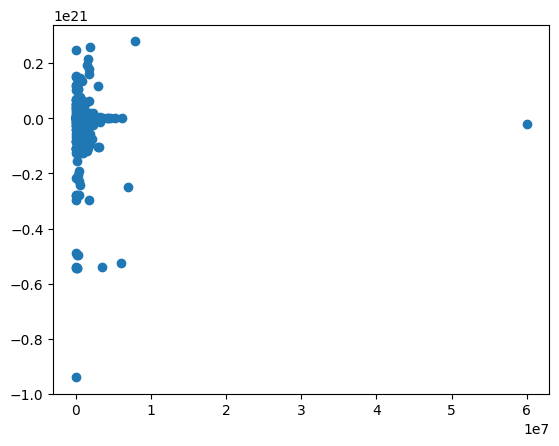

In [ ]:

plt.scatter(y_test,y_pred)

In [ ]:
num_features_to_select =10
rfe = RFE(estimator=lm, n_features_to_select=num_features_to_select)

In [ ]:
lm = LinearRegression()
rfe=RFE(lm,n_features_to_select=10)
rfe=rfe.fit(x_train, y_train)

In [ ]:
list(zip(x_train.columns, rfe.support_, rfe.ranking_))

[('kms_driven', False, 811),
 ('year_of_manufacture', False, 411),
 ('car_age', False, 412),
 ('car_name_Audi A3 35 TDI Premium Plus', False, 770),
 ('car_name_Audi A3 35 TDI Premium Plus + Sunroof', False, 776),
 ('car_name_Audi A3 35 TDI Technology + Sunroof', False, 775),
 ('car_name_Audi A3 35 TFSI Premium Plus', False, 175),
 ('car_name_Audi A3 40 TFSI Premium', False, 198),
 ('car_name_Audi A3 40 TFSI Premium Plus + sunroof', False, 228),
 ('car_name_Audi A4 2.0 TDI (143 bhp)', False, 781),
 ('car_name_Audi A4 2.0 TDI (143bhp)', False, 783),
 ('car_name_Audi A4 2.0 TDI (177bhp) Premium', False, 784),
 ('car_name_Audi A4 2.0 TDI (177bhp) Premium Plus', False, 782),
 ('car_name_Audi A4 2.0 TDI Sline', False, 973),
 ('car_name_Audi A4 3.0 TDI quattro Technology Pack', False, 831),
 ('car_name_Audi A4 35 TDI Premium', False, 772),
 ('car_name_Audi A4 35 TDI Premium Plus', False, 828),
 ('car_name_Audi A4 35 TDI Technology', False, 777),
 ('car_name_Audi A4 35 TFSI Premium Sunroof', F


# Building a Linear Model using statsmodels

In [ ]:
# Subset the features selected by rfe1
col1 = x_train.columns[rfe.support_]


In [ ]:
# subsetting training data for 10 columns
x_train_rfe = x_train[col1]


In [ ]:
# add constant to model
x_train_rfe = sm.add_constant(x_train_rfe)
x_train_rfe.head()

,const,car_name_Land Rover Range Rover Velar 2.0 R-Dynamic S Petrol 250 [2017-2020],car_name_Mahindra Thar LX 4-STR Hard Top Petrol AT,car_name_Mahindra Thar LX Hard Top Petrol MT,car_name_Mercedes-Benz E-Class E250 CDI Avantgarde,car_name_Mercedes-Benz GL 350 CDI,car_name_Mercedes-Benz GLC 220 d Sport,car_name_Mercedes-Benz GLS 350 d,car_name_Mercedes-Benz S-Class 350 CDI L,car_name_Mercedes-Benz S-Class S 350 CDI,car_name_Volkswagen Taigun GT Plus 1.5 TSI DSG
561,1.0,0,0,0,0,0,0,0,0,0,0
1088,1.0,0,0,0,0,0,0,0,0,0,0
1953,1.0,0,0,0,0,0,0,0,0,0,0
1396,1.0,0,0,0,0,0,0,0,0,0,0
1347,1.0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#fitting the model with 10 variables
lm1 = sm.OLS(y_train,x_train_rfe).fit()

In [ ]:
# Performing a summary operation lists out all the different parameters of the regression line fitted
print(lm1.summary())

                             OLS Regression Results                            
Dep. Variable:     car_price_in_rupees   R-squared:                       0.005
Model:                             OLS   Adj. R-squared:                 -0.002
Method:                  Least Squares   F-statistic:                    0.7629
Date:                 Sat, 20 Jan 2024   Prob (F-statistic):              0.665
Time:                         06:40:44   Log-Likelihood:                -22886.
No. Observations:                 1409   AIC:                         4.579e+04
Df Residuals:                     1398   BIC:                         4.585e+04
Df Model:                           10                                         
Covariance Type:             nonrobust                                         
                                                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------

An R-squared value of 0.005 indicates that  linear model is not explaining much of the variance in the dependent variable.
The F-statistic is close to 1,suggests that the model is not explaining a significant amount of variance in the dependent variable.


In [ ]:
vif = pd.DataFrame()
vif['Fetures'] = x_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe.values,i) for i in range(x_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Fetures,VIF
0,const,1.01
1,car_name_Land Rover Range Rover Velar 2.0 R-Dy...,1.00
2,car_name_Mahindra Thar LX 4-STR Hard Top Petro...,1.00
3,car_name_Mahindra Thar LX Hard Top Petrol MT,1.00
4,car_name_Mercedes-Benz E-Class E250 CDI Avantg...,1.00
5,car_name_Mercedes-Benz GL 350 CDI,1.00
6,car_name_Mercedes-Benz GLC 220 d Sport,1.00
7,car_name_Mercedes-Benz GLS 350 d,1.00
8,car_name_Mercedes-Benz S-Class 350 CDI L,1.00
9,car_name_Mercedes-Benz S-Class S 350 CDI,1.00


A VIF of 1 indicates that there is no correlation between variables in the model.

# Random forest regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initializing the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Training the model on the training set
model.fit(x_train_scaled, y_train)

# Making predictions on the testing set
y_pred = model.predict(x_test_scaled)

# Evaluating the model
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)

print("Mean absolute error", mae)
print("R2 Score", score)

Mean absolute error 515272.74834437086
R2 Score -0.009495435699560018


# Creating ML model using Random Forest Regressor

Mean absolute error 515272.74834437086
R2 Score -0.009495435699560018


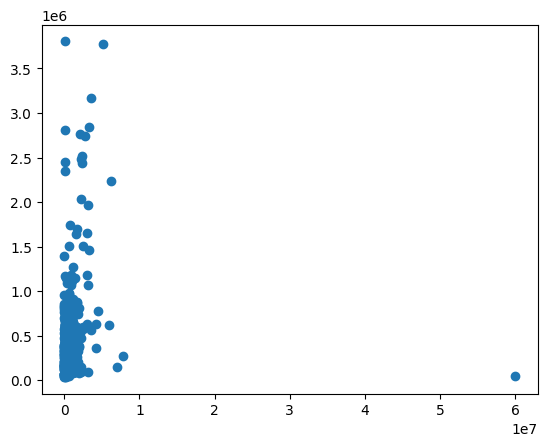

In [ ]:
import pickle # To save model for future use

from sklearn.ensemble import RandomForestRegressor

# Initializing the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Training the model on the training set
model.fit(x_train_scaled, y_train)

# Making predictions on the testing set
y_pred = model.predict(x_test_scaled)

# Evaluating the model
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

plt.scatter(y_test,y_pred)

pickle.dump(model , open('car_price_in_rupees.pk1' , 'wb'))


# Making Prediction

In [ ]:
import pickle

car_price_model = pickle.load(open('car_price_in_rupees.pk1' , 'rb'))

car_price_model_accuracy = car_price_model.score(x_test_scaled, y_test)

print("Car Price Model Accuracy:" , car_price_model_accuracy * 100 , "%")

Car Price Model Accuracy: -0.9495435699560018 %


This accuracy is negative which is very unusual.

# Evaluation of Model

Text(0, 0.5, 'y_pred')

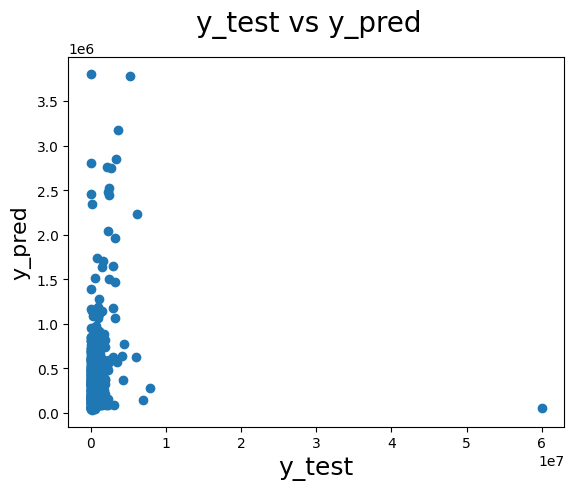

In [ ]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

-0.009495435699560018

All the test details obtained from these models showcase the results which are difficult for interpretations,hence the accuracy is very low.